# Lesson 1 Assignment - EnergyLoads
## Author - Studentname

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set there some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"

In [3]:
## Read the data
buildings_and_power = pd.read_csv(fileName)
buildings = pd.DataFrame(buildings_and_power)
print(buildings.head(10))
print(buildings.describe())


   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   
5                  0.90         563.5      318.5     122.50             7.0   
6                  0.90         563.5      318.5     122.50             7.0   
7                  0.90         563.5      318.5     122.50             7.0   
8                  0.86         588.0      294.0     147.00             7.0   
9                  0.86         588.0      294.0     147.00             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0            2           0.0                          0  

In [4]:
cols = ['Relative Compactness', 'Surface Area''Wall Area', 'Roof Area', 'Overall Height','Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']
for column in cols: 
    ##buildings_and_power.loc[buildings_and_power[column] == '?', column] = np.nan
    buildings.dropna(axis = 0, inplace = True)
    continue

In [5]:
print(buildings.shape)
print(buildings.dtypes)


(768, 10)
Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object


In [6]:
buildings['counts']=1

In [7]:
print(buildings.describe())

       Relative Compactness  Surface Area   Wall Area   Roof Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall Height  Orientation  Glazing Area  Glazing Area Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.000000              

In [32]:
print(buildings[['counts', 'Overall Height']].groupby(['Overall Height']).agg('count'))

                counts
Overall Height        
3.5                384
7.0                384


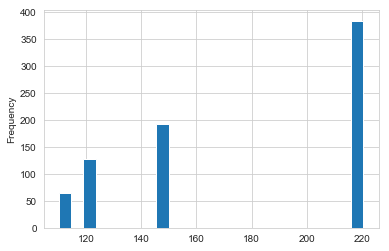

In [54]:
%matplotlib inline
buildings.loc[:, 'Roof Area'].plot.hist(bins = 25)

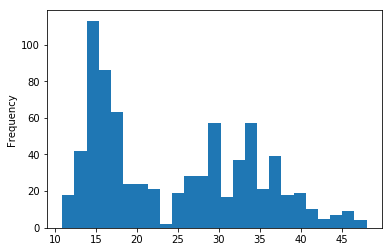

In [38]:
buildings.loc[:, 'Cooling Load'].plot.hist(bins = 25)

{'whiskers': [<matplotlib.lines.Line2D object at 0x116e56390>, <matplotlib.lines.Line2D object at 0x116e56668>], 'caps': [<matplotlib.lines.Line2D object at 0x116e569e8>, <matplotlib.lines.Line2D object at 0x102fc5cf8>], 'boxes': [<matplotlib.lines.Line2D object at 0x116e56a90>], 'medians': [<matplotlib.lines.Line2D object at 0x116fd25f8>], 'fliers': [<matplotlib.lines.Line2D object at 0x116fd2f28>], 'means': []}


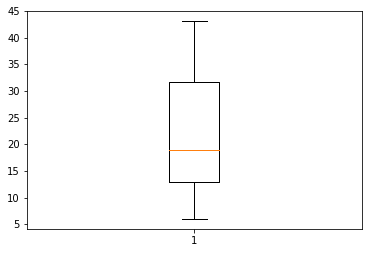

In [15]:
import matplotlib.pyplot as plt
print(plt.boxplot(buildings.loc[:,'Heating Load']))

In [20]:
fig = plt.figure(figsize=(6, 6))  ##define plot area
ax = fig.gca() ## define axis 
%matplotlib inline
buildings.loc[:,'Heating Load'].boxplot
##ax.set_title('Box plot of Loads') # Give the plot a main title
##ax.set_ylabel('Da Load')# Set text for y axis
##ax.set_ylim(0.0, 100.0) # Set the limits of the y axis

AttributeError: 'Series' object has no attribute 'boxplot'

Text(0, 0.5, 'Density')

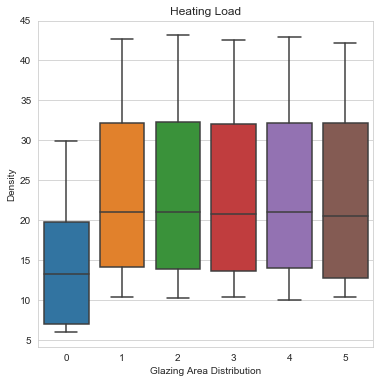

In [26]:
import seaborn as sns
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'Glazing Area Distribution', y = 'Heating Load', data = buildings, ax = ax)
ax.set_title('Heating Load') # Give the plot a main title
ax.set_xlabel('Glazing Area Distribution') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

In [67]:
print(buildings.loc[:,'Relative Compactness'])


0      0.98
1      0.98
2      0.98
3      0.98
4      0.90
5      0.90
6      0.90
7      0.90
8      0.86
9      0.86
10     0.86
11     0.86
12     0.82
13     0.82
14     0.82
15     0.82
16     0.79
17     0.79
18     0.79
19     0.79
20     0.76
21     0.76
22     0.76
23     0.76
24     0.74
25     0.74
26     0.74
27     0.74
28     0.71
29     0.71
       ... 
738    0.79
739    0.79
740    0.76
741    0.76
742    0.76
743    0.76
744    0.74
745    0.74
746    0.74
747    0.74
748    0.71
749    0.71
750    0.71
751    0.71
752    0.69
753    0.69
754    0.69
755    0.69
756    0.66
757    0.66
758    0.66
759    0.66
760    0.64
761    0.64
762    0.64
763    0.64
764    0.62
765    0.62
766    0.62
767    0.62
Name: Relative Compactness, Length: 768, dtype: float64


Text(0, 0.5, 'Density')

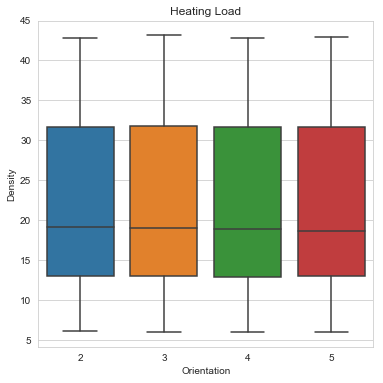

In [30]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'Orientation', y = 'Heating Load', data = buildings, ax = ax)
ax.set_title('Heating Load') # Give the plot a main title
ax.set_xlabel('Orientation') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

Text(0, 0.5, 'Density')

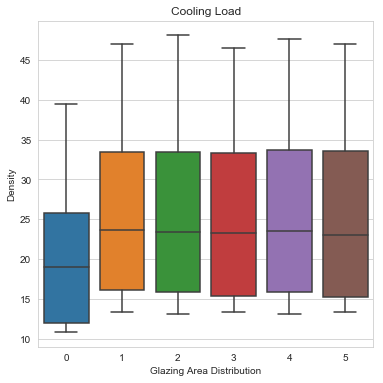

In [29]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'Glazing Area Distribution', y = 'Cooling Load', data = buildings, ax = ax)
ax.set_title('Cooling Load') # Give the plot a main title
ax.set_xlabel('Glazing Area Distribution') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

Text(0, 0.5, 'Density')

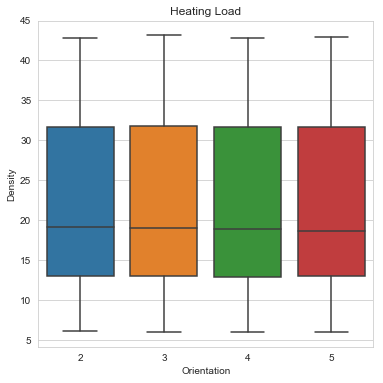

In [31]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'Orientation', y = 'Heating Load', data = buildings, ax = ax)
ax.set_title('Heating Load') # Give the plot a main title
ax.set_xlabel('Orientation') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis


Text(0, 0.5, 'Overall Height')

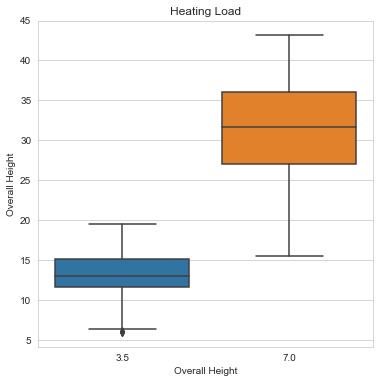

In [34]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'Overall Height', y = 'Heating Load', data = buildings, ax = ax)
ax.set_title('Heating Load') # Give the plot a main title
ax.set_xlabel('Overall Height') # Set text for the x axis
ax.set_ylabel('Overall Height')# Set text for y axis



Text(0, 0.5, 'Overall Height')

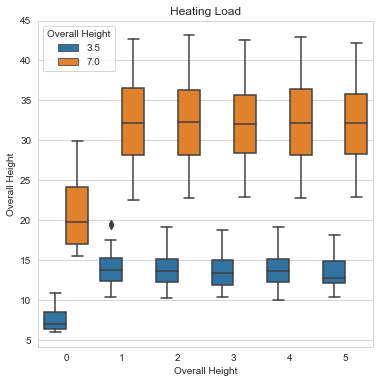

In [39]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'Glazing Area Distribution', y = 'Heating Load', data = buildings, hue = 'Overall Height', ax = ax)
ax.set_title('Heating Load') # Give the plot a main title
ax.set_xlabel('Overall Height') # Set text for the x axis
ax.set_ylabel('Overall Height')# Set text for y axis

Text(0, 0.5, 'Overall Height')

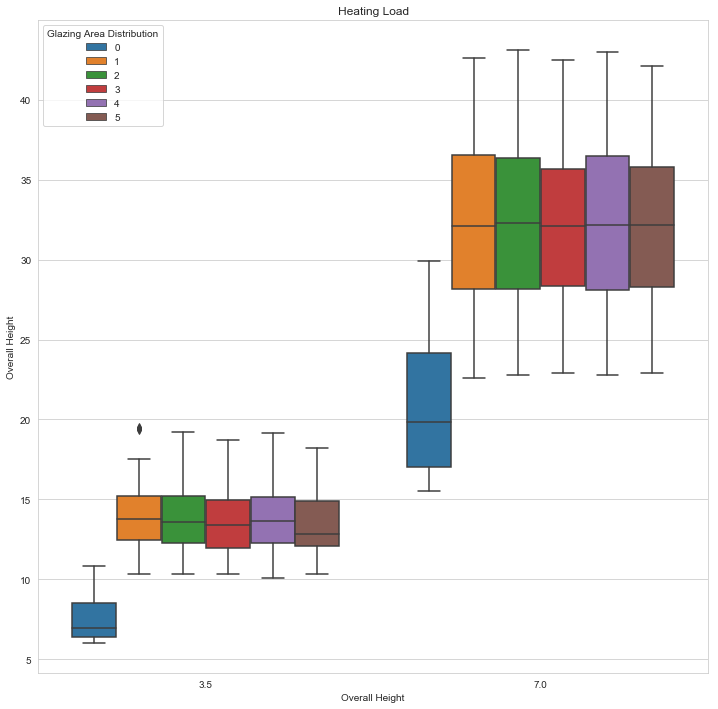

In [42]:
fig = plt.figure(figsize=(12,12)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'Overall Height', y = 'Heating Load', data = buildings, hue = 'Glazing Area Distribution', ax = ax)
ax.set_title('Heating Load') # Give the plot a main title
ax.set_xlabel('Overall Height') # Set text for the x axis
ax.set_ylabel('Overall Height')# Set text for y axis

Text(0, 0.5, 'Heating Load')

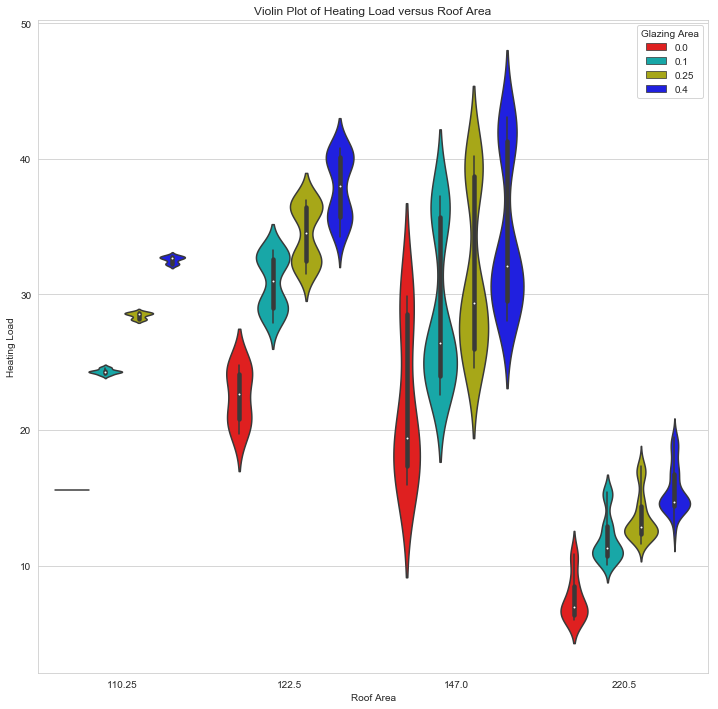

In [64]:
fig = plt.figure(figsize=(12,12)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x="Roof Area", y="Heating Load", hue="Glazing Area",
              palette=["r", "c", "y", "b"], data= buildings)
##sns.violinplot(x = 'Glazing Area',y = 'Heating Load', hue = 'Glazing Area Distribution', data = buildings, ax = ax)
ax.set_title('Violin Plot of Heating Load versus Roof Area') # Give the plot a main title
ax.set_xlabel('Roof Area') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis

Text(0, 0.5, 'Heating Load')

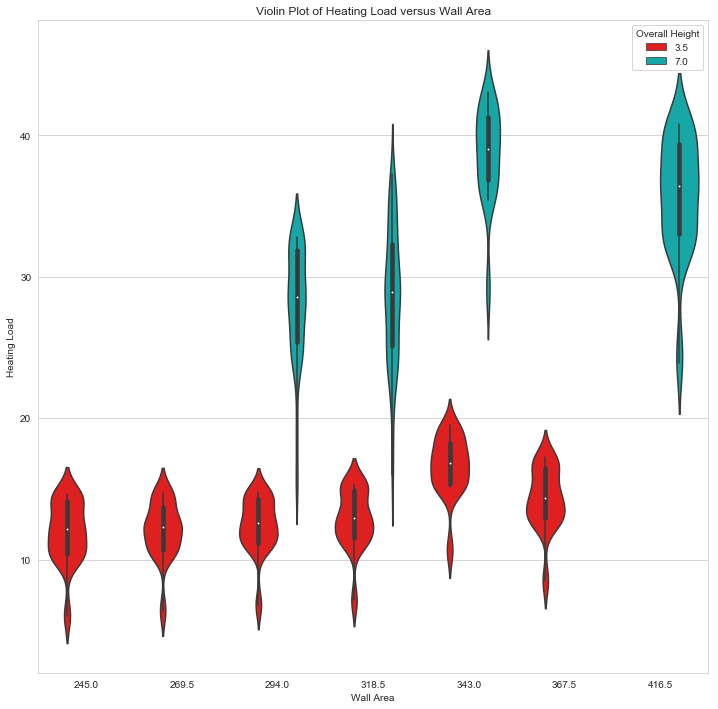

In [65]:
fig = plt.figure(figsize=(12,12)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x="Wall Area", y="Heating Load", hue="Overall Height",
              palette=["r", "c", "y", "b"], data= buildings)
##sns.violinplot(x = 'Glazing Area',y = 'Heating Load', hue = 'Glazing Area Distribution', data = buildings, ax = ax)
ax.set_title('Violin Plot of Heating Load versus Wall Area') # Give the plot a main title
ax.set_xlabel('Wall Area') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis

Text(0, 0.5, 'Heating Load')

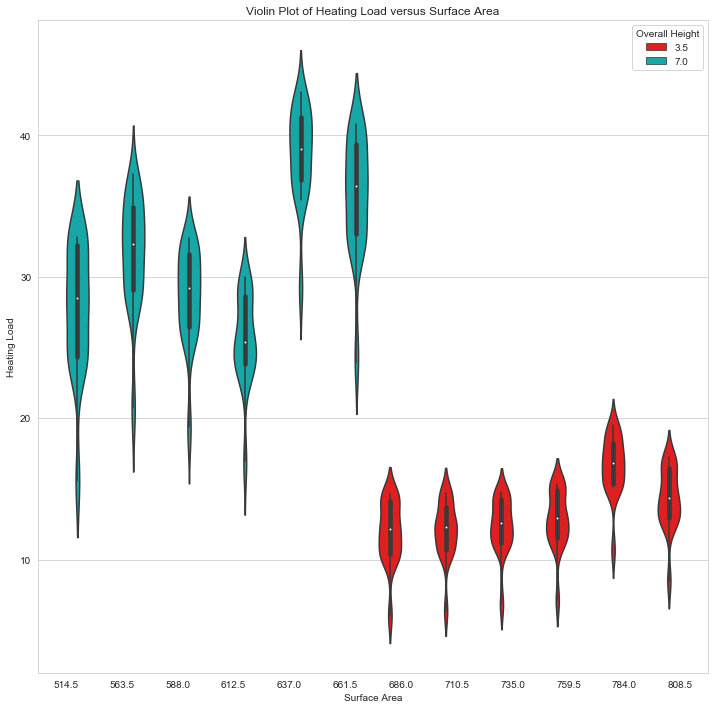

In [66]:
fig = plt.figure(figsize=(12,12)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x="Surface Area", y="Heating Load", hue="Overall Height",
              palette=["r", "c", "y", "b"], data= buildings)
##sns.violinplot(x = 'Glazing Area',y = 'Heating Load', hue = 'Glazing Area Distribution', data = buildings, ax = ax)
ax.set_title('Violin Plot of Heating Load versus Surface Area') # Give the plot a main title
ax.set_xlabel('Surface Area') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis

Text(0, 0.5, 'Heating Load')

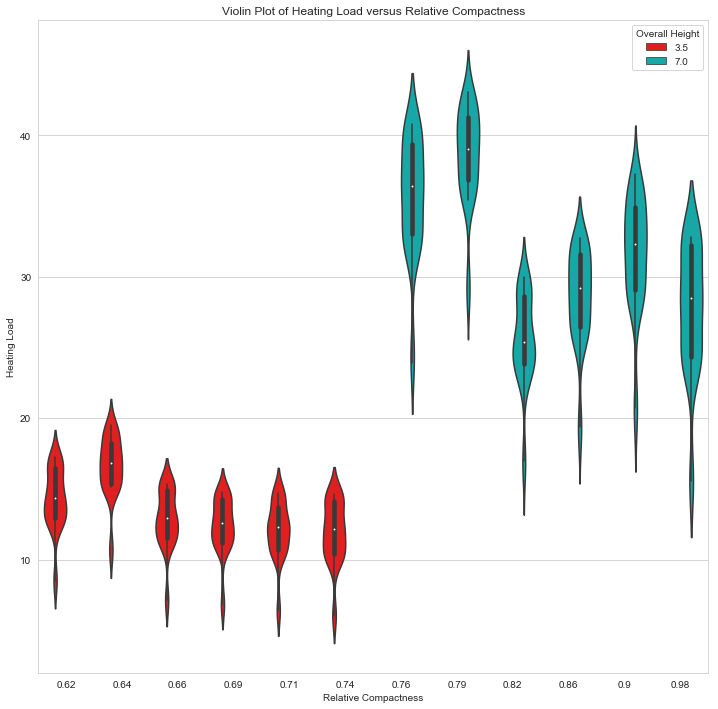

In [68]:
fig = plt.figure(figsize=(12,12)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x="Relative Compactness", y="Heating Load", hue="Overall Height",
              palette=["r", "c", "y", "b"], data= buildings)
##sns.violinplot(x = 'Glazing Area',y = 'Heating Load', hue = 'Glazing Area Distribution', data = buildings, ax = ax)
ax.set_title('Violin Plot of Heating Load versus Relative Compactness') # Give the plot a main title
ax.set_xlabel('Relative Compactness') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis

Text(0, 0.5, 'Heating Load')

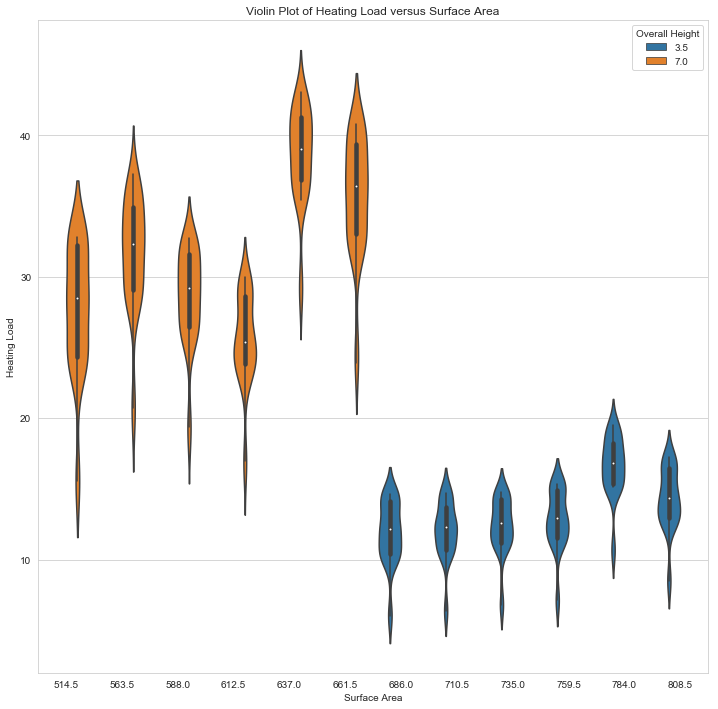

In [75]:
fig = plt.figure(figsize=(12,12)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x="Surface Area", y="Heating Load", hue="Overall Height", data= buildings)
##sns.violinplot(x = 'Glazing Area',y = 'Heating Load', hue = 'Glazing Area Distribution', data = buildings, ax = ax)
ax.set_title('Violin Plot of Heating Load versus Surface Area') # Give the plot a main title
ax.set_xlabel('Surface Area') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis